<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
!python -m pip install PyMieSim --no-cache-dir --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 137.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 161.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 124.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 191.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 159.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 189.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 161.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 113.1 MB/s eta 0:00:00


Experiment imports
------------------

In [2]:
import numpy as np
from PyMieSim.experiment.scatterer import Sphere
from PyMieSim.experiment.source import Gaussian
from PyMieSim.experiment.detector import Photodiode
from PyMieSim.experiment import Setup
from TypedUnit import ureg
from PyOptik import Material

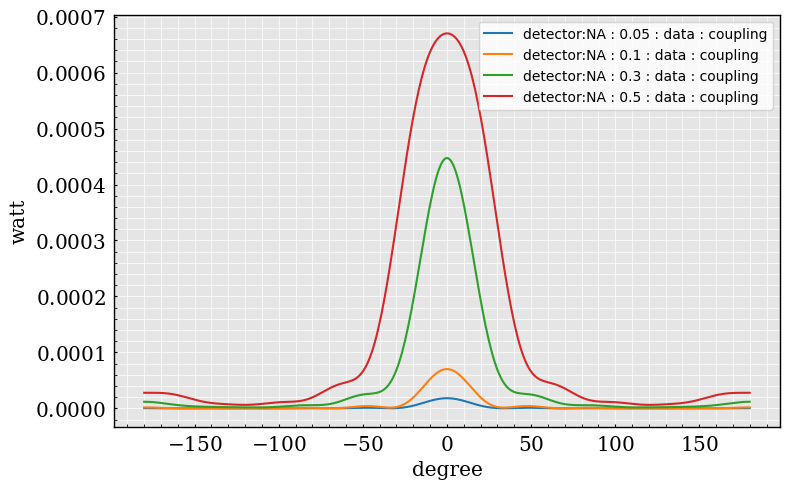

<Axes: xlabel='degree', ylabel='watt'>

In [3]:
# Defining the source to be employed.
source = Gaussian(
    wavelength=1200 * ureg.nanometer,
    polarization=0 * ureg.degree,
    optical_power=1e-3 * ureg.watt,
    NA=0.2 * ureg.AU
)

# Defining the ranging parameters for the scatterer distribution
scatterer = Sphere(
    diameter=2000 * ureg.nanometer,
    property=Material.BK7,
    medium_property=1 * ureg.RIU,
    source=source
)


# Defining the detector to be employed.
detector = Photodiode(
    NA=[0.5, 0.3, 0.1, 0.05] * ureg.AU,
    phi_offset=np.linspace(-180, 180, 400) * ureg.degree,
    gamma_offset=0 * ureg.degree,
    sampling=400 * ureg.AU,
    polarization_filter=None
)

# Defining the experiment setup
experiment = Setup(scatterer=scatterer, source=source, detector=detector)

# Measuring the properties
dataframe = experiment.get('coupling')

# Plotting the results
dataframe.plot(x="detector:phi_offset")
